# Brief 3 Decision tree, random Forest  --Aude

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [209]:
df = pd.read_csv('housing.csv')

In [210]:
df.shape

(20640, 10)

## 1.2  Information sur les données

### 1.  Créez un code qui lit le fichier "housing.csv" et affiche ses premières lignes.  Pour ce faire,utilisez les fonctions"read_csv"et "head" de la bibliothèque pandas.  Sachant que la valeurcible est"median_house_value", traitons-nous un problème de classification ou de régres-sion ?

In [211]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Il s'agit d'un problème de regression

### 2. Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des at-tributs et le nombre de valeurs non nulles. Quelle remarque sur l’attribut"total_bedrooms"par rapport aux autres attributs ?

In [212]:
print("lignes: ", str(df.shape[0]), "colonnes: ", str(df.shape[1]))

print(df.info())

lignes:  20640 colonnes:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


L'attribut "total_bedrooms" contient des valeurs nulles

In [213]:
# remplacer les variables nulles par la moyenne

from sklearn.impute import SimpleImputer

imptr_train=SimpleImputer(missing_values=np.nan, strategy='mean')
print((df.iloc[:,4:5]).shape)
df.iloc[:,4:5] = imptr_train.fit_transform(df.iloc[:,4:5])
print(df.info())

(20640, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


### 3.  A travers la question précédente, vous avez du remarquez que le type dans valeurs utiliséesdans l’attribut"ocean_proximity"est un objet (forcément un texte vu qu’on manipule unfichier CSV). Il est intéressant de connaître ses valeurs. Pour cette finalité, créez un code quiaffiche l’occurrence des valeurs utilisées dans cet attribut.

In [214]:
print(df.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [215]:
#utilisation de get_dummies pour la colonne ocean_proximity
ocean = pd.get_dummies(df.ocean_proximity)
print(a)
df = df.drop(['ocean_proximity'], axis=1)
df = pd.concat((df, ocean), axis=1)
print(df.head())

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25  

In [216]:


#definition de X et Y
X = df.drop(['median_house_value'], axis=1)

Y = df['median_house_value']
Y=np.array((Y))
Y = Y.reshape((Y.shape[0],1))

print(X.shape)
print(Y.shape)


(20640, 13)
(20640, 1)


### 4.  Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.

In [217]:
print(round(df.describe()),2)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count    20640.0   20640.0             20640.0      20640.0         20640.0   
mean      -120.0      36.0                29.0       2636.0           538.0   
std          2.0       2.0                13.0       2182.0           419.0   
min       -124.0      33.0                 1.0          2.0             1.0   
25%       -122.0      34.0                18.0       1448.0           297.0   
50%       -118.0      34.0                29.0       2127.0           438.0   
75%       -118.0      38.0                37.0       3148.0           643.0   
max       -114.0      42.0                52.0      39320.0          6445.0   

       population  households  median_income  median_house_value  <1H OCEAN  \
count     20640.0     20640.0        20640.0             20640.0    20640.0   
mean       1425.0       500.0            4.0            206856.0        0.0   
std        1132.0       382.0            2.0       

### 5.  Créez un code qui affiche les histogrammes des différents attributs.  Le nombre de "bins" àsaisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

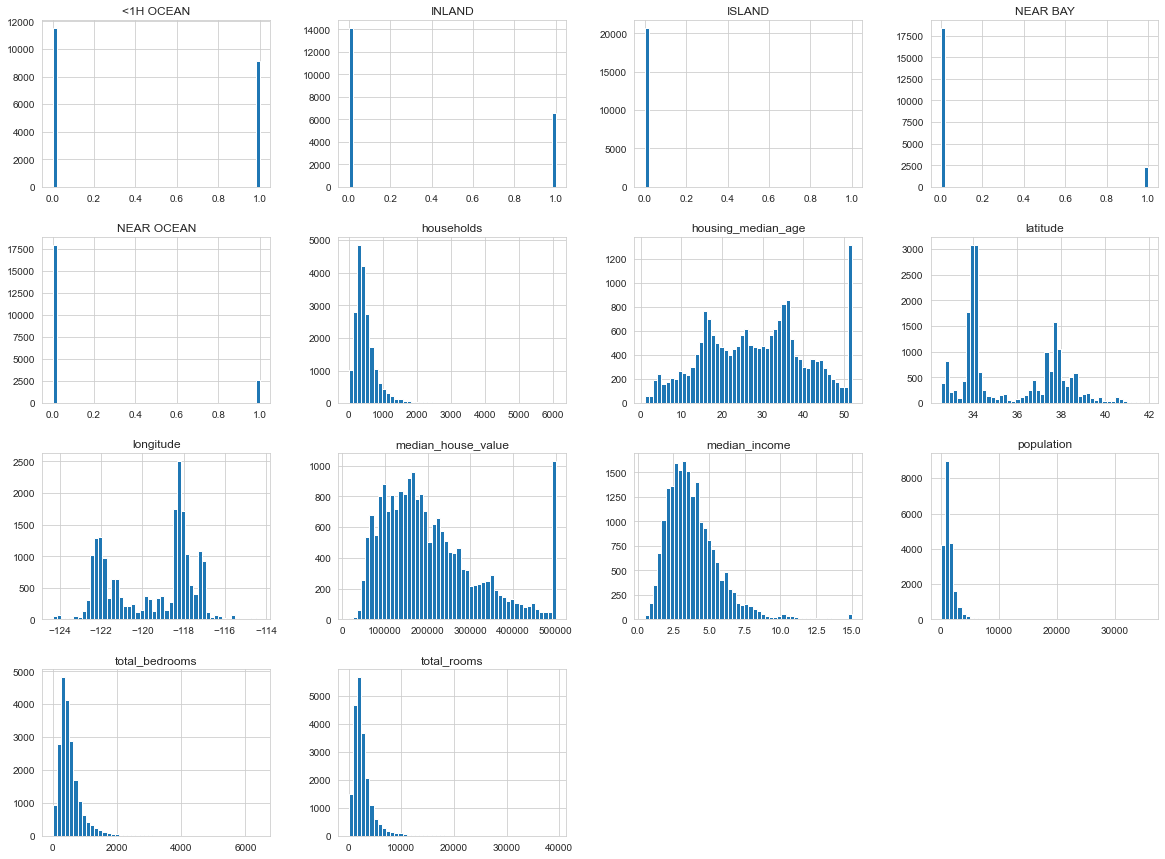

In [258]:
df.hist(bins=50, figsize=(20,15))
plt.show()
#plt.figure(figsize=(20,15))
#plt.hist(X, bins=50)

#plt.show()

## 1.3  Répartition des données

### 1.  Créez un code qui partitionne les données en base d’apprentissage et base de test.  Optezpour 80% pour l’apprentissage et 20% pour le test.

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape, y_test.shape

((16512, 13), (4128, 13), (4128, 1))

### 2.  Affichez l’en-tête de la base de test

In [220]:
print(X_test[:5])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14740    -117.05     32.58                22.0       2101.0           399.0   
10101    -117.97     33.92                32.0       2620.0           398.0   
20566    -121.84     38.65                29.0       3167.0           548.0   
2670     -115.60     33.20                37.0        709.0           187.0   
15709    -122.43     37.79                25.0       1637.0           394.0   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
14740      1551.0       371.0         4.1518          0       0       0   
10101      1296.0       429.0         5.7796          1       0       0   
20566      1554.0       534.0         4.3487          0       1       0   
2670        390.0       142.0         2.4511          0       1       0   
15709       649.0       379.0         5.0049          0       0       0   

       NEAR BAY  NEAR OCEAN  
14740         0           1  
10101         

## 1.4  Découverte et visualisation des données

### 1.  Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude. Optez pour letype scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètrequi joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

In [221]:
X_train['longitude']

12069   -117.55
15925   -122.44
11162   -118.00
4904    -118.26
4683    -118.36
          ...  
13123   -121.26
19648   -120.89
9845    -121.90
10799   -117.93
2732    -115.56
Name: longitude, Length: 16512, dtype: float64

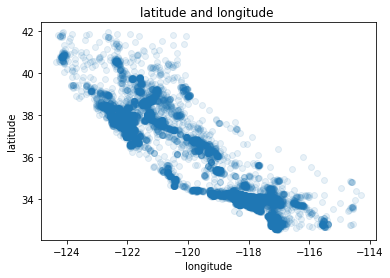

In [222]:
plt.scatter(X_train['longitude'],X_train['latitude'], alpha = 0.1)
plt.title('latitude and longitude ')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

### 2.  Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et leprix des maisons (target). Optez pour une valeur égale à False de "sharex".

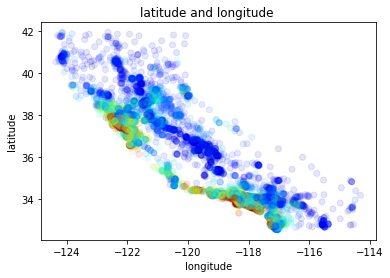

In [234]:

fig, ax = plt.subplots(sharex=False)

ax.scatter(X_train['longitude'],X_train['latitude'], c= y_train, alpha = 0.1, cmap=plt.get_cmap('jet'))
plt.title('latitude and longitude ')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()



### 3.  Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelquesmaisons. 
Pour ce faire :

•  Téléchargez l’image de la californie

•  Utilisez la fonction imread du sous-module image du module matplotlib

•  Utilisez la fonction imshow du sous-module pyplot du module matplotlib

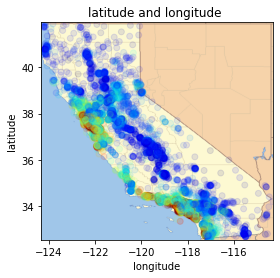

In [242]:
cali = plt.imread('california.png')

fig, ax = plt.subplots(sharex=False)
ax.imshow(cali, extent = [X_train['longitude'].min(), X_train['longitude'].max(), X_train['latitude'].min(), X_train['latitude'].max()])

ax.scatter(X_train['longitude'],X_train['latitude'], c= y_train, alpha = 0.1, cmap=plt.get_cmap('jet'), )

plt.title('latitude and longitude ')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


### 4. Une  pratique  très  intéressante  dans  l’analyse  de  données  est  l’étude  des  corrélation  en-tre  les  variables. 

Créez  un  code  qui  affiche,  en  valeur,  la  corrélation  de  l’attribut"me-dian_house_value"avec les autres attributs.

Qu’est ce que vous remarquez ?

In [255]:
corr_matrix = df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

On remarque que la valeur de la maison est liée positivement au revenu moyen et négativement à l'éloignement par rapport à la mer.

## 1.5  Nettoyage des données
Avant d’intégrer les données dans un algorithme d’apprentissage automatique, il est indispens-able de séparer le "features" et la valeur cible (target).


### 1.  Créez un code permettant de créer deux variables :
•  Une première contenant que les input. Utilisez la fonction drop du module pandas

•  Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

### 2.  Dans la question 8, vous avez dû remarquer que l’attribut"total_bedrooms"a des valeursmanquantes (NaN). 
Pour remédier à ceci, il existes trois options :

•  Supprimer les valeurs manquantes (NaN)

•  Supprimer l’attribut"total_bedrooms"

•  Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane,. . . ). 
Nous optons pour cette méthode.  Ecrivez un code qui remplace les valeurs man-quantes par la médiane. Utilisez les fonctions median et fillna du module Pandas.

Véri-fiez avec la fonction "info" si le problème a été résolu.3.  Les algorithmes d’apprentissage profond préfère de travailler avec les données numériques.Ceci est valable pour tous les attributs sauf"ocean_proximity". Vérifiez ceci en affichant 10de ces valeurs. Transformer les valeurs qualitatives en des valeurs numériques.4.  Affichez les données pour vérifier le résultat

#### Tout a déjà été réalisé précédemment

## 2  Sélection, apprentissage et évaluation du modèle

### 1.  Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.

In [256]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_test, y_test))

0.6381617983930401


### 2.  Créez un code qui prédit les classes de la base d’apprentissage.   Pour ce faire,  utilisez laméthode predict de la classe LinearRegression en donnant comme argument les donnéesd’apprentissage. Ensuite, affichez les valeurs cible réelles et celles prédites.

In [278]:
y_pred = reg.predict(X_train)

#affichage
print(y_train)
print("************************** prédictions *********************************")
print(np.round(y_pred))

[[500001.]
 [270000.]
 [196100.]
 ...
 [289300.]
 [484600.]
 [ 69400.]]
************************** prédictions *********************************
[[152473.]
 [275083.]
 [221393.]
 ...
 [264242.]
 [311804.]
 [ 26024.]]


### 3.  Calculez la mesure RMSE du modèle de la régression linéaire.

In [279]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred, squared=False)

68717.7964740298

### 4.  Refaites  les  deux  étapes  précédentes  avec  le  modèle  DecisionTreeRegressor.   Calculez  lamesure  RMSE  du  modèle  DecisionTreeRegressor  qui  existe  dans  le  sous-module  tree  dumodule sklearn.

In [296]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='mse')
regressor = regressor.fit(X_train, y_train)
y_tree = regressor.predict(X_train)


print(mean_squared_error(y_train, y_tree, squared=False))


0.0


### 5.  Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclureque ce modèle fonctionne parfaitement sur la base d’apprentissage.  
Pour s’assurer, on varépartir la  base  d’apprentissage  en base  d’apprentissage et  en base  de  test en  utilisant laméthode 10-fold cross-validation. 
Pour ce faire, utilisez la fonction cross_val_score du sous-module model_selection du module sklearn. Ensuite, affichez :

•  La valeur RMSE de chaque fold

•  La moyenne des RMSE de tous les folds

•  L’écart type de tous les folds

In [302]:
from sklearn.model_selection import cross_val_score

k = 10    #nombre de folds

regressor = DecisionTreeRegressor(criterion='mse')
scores = cross_val_score(regressor, X, Y ,scoring="neg_mean_squared_error", cv= k)

rmse_scores = np.sqrt(-scores)

print(np.round(rmse_scores))
print("moyenne rmse : ", str(np.round(np.mean(rmse_scores))))
print("ecart-type : ", str(np.round(np.std(rmse_scores))))

[141028.  71237. 104265.  75901.  89285.  83254.  63753. 108717. 103030.
  75301.]
moyenne rmse :  91577.0
ecart-type :  21919.0


### 6.  Suivre les étapes de la question précédente sur le modèle de la régression linéaire.  Ensuite,comparez les résultats avec ceux du DecisionTreeRegressor. Quel modèle présente un prob-lème d’apprentissage ? pourquoi ?

In [303]:
from sklearn.model_selection import cross_val_score

k = 10    #nombre de folds

reg = LinearRegression()
scores = cross_val_score(reg, X, Y ,scoring="neg_mean_squared_error", cv= k)

rmse_scores = np.sqrt(-scores)

print(rmse_scores)
print("moyenne rmse : ", str(np.mean(rmse_scores)))
print("ecart-type : ", str(np.std(rmse_scores)))

[85453.3220931  59733.90627769 88058.11020226 62803.86299438
 80785.8681941  69653.91713994 52462.39353981 91536.72825902
 78105.508377   53546.26150442]
moyenne rmse :  72213.98785817125
ecart-type :  13774.38913556604


##### Le modèle de regression linéaire est légèrement meilleur que le decision tree (erreur moyenne tree: 91000, erreur moyenne lineaire: 72000)

## 3  Fine-Tunning

### 3.1  Grid Search
Dans cette, partie nous allons chercher les paramètres du modèle de régression qui donnent lesmeilleurs résultats

#### 1.  Écrire un code qui :
•  Crée un objet de la classe RandomForestRegressor

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

forest_reg = RandomForestRegressor()


#### Crée la variable suivante :param_grid= [′n_estimators′:[3, 10, 30],′max_f eatures′:[2, 4, 6, 8]]Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de laméthode RandomForestRegressor. Au total, 4x3=12 combinaisons vont être testées.

In [311]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}
    ]


####   Applique une recherche, de type GridSearch, du couple qui donne le meilleur résultat.Pour ce faire, utilisez la fonction GridSearchCV du sous-module model_selection dumodule sklearn. Optez pour une valeur de 5 pour "cv" (une validation croisée de type5-fold cross-validation)

In [314]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarni

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

#### 2.  Affichez  les  meilleurs  paramètres  de  la  méthode  RandomForestRegressor  en  utilisant  lafonction best_params_

In [315]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

#### 3.  Affichez les résultats des 12 combinaisons avec la fonction grid-search

In [316]:
resultats = grid_search.cv_results_

print("{}\t\t {}\n".format('Mean Score','Parameters'))

for mean_score, params in zip(resultats["mean_test_score"], resultats["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))


Mean Score		 Parameters

80596.00	 {'max_features': 2, 'n_estimators': 3}
76114.34	 {'max_features': 2, 'n_estimators': 10}
72972.06	 {'max_features': 2, 'n_estimators': 30}
81613.74	 {'max_features': 4, 'n_estimators': 3}
73579.04	 {'max_features': 4, 'n_estimators': 10}
71356.29	 {'max_features': 4, 'n_estimators': 30}
79133.78	 {'max_features': 6, 'n_estimators': 3}
78972.15	 {'max_features': 6, 'n_estimators': 10}
72871.68	 {'max_features': 6, 'n_estimators': 30}
93921.91	 {'max_features': 8, 'n_estimators': 3}
80860.47	 {'max_features': 8, 'n_estimators': 10}
76189.99	 {'max_features': 8, 'n_estimators': 30}


### 3.2  Evaluation sur la base de test

Testez votre modèle d’apprentissage sur la base de test. 
Pour ce faire, pensez à :

1.  Remplacer les valeurs NaN de l’attribut "total_bedrooms" de la base de test par la médiane

2.  Transformer les valeurs textuelles de "ocean_proximity" en valeurs numériques

3.  Stocker le modèle d’apprentissage dans une variable en utilisant la fonction best_estimator_du module GridSearchCV4.

Calculer la valeur RMSE du modèle sur la base de test

#### les donnees avaient été préparées avant le split

In [318]:
# stocker le meilleur modele
modele = grid_search.best_estimator_

predictions = modele.predict(X_test)

mse = mean_squared_error(y_test, predictions)

# calcul du RMSE
print(np.sqrt(mse))

18828.02498791018
